<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Midterm Exam in Software Engineering for Data Science  - Fall 2023
## Exam Duration: 02 H
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Revised Exam Instruction:

During this exam, you are permitted to refer to your lecture notes, lab materials, or any online standard Git or Python libraries documentations. Additionally, you may use resources such as Stack Overflow or their alternatives for problem-solving, or addressing code compilation errors. However, the use of ChatGPT and its alternatives is strictly prohibited. Please be aware that your solutions will undergo an AI-based ChatGPT detection process to ensure compliance. It is imperative that you rely on the authorized resources for assistance during the exam. Any violation of this policy will result in sanctions, including a grade of zero for the specific exercise or challenge in question. It is imperative to adhere to the specified guidelines to maintain a fair and equitable assessment environment. Your cooperation is appreciated, and any concerns or questions should be directed to the exam proctor or instructor. Thank you for your understanding and compliance.

## Note: Choosing Your Continued Evaluation Challenge:
While all challenges are integral components of the Midterm exam, you have the flexibility to select one challenge — either Challenge 2 or Challenge 3 — for incorporation into your final Continued Evaluation Grade.

# your Choice For the Challenge to Be incorporated in the Final Continued Evaluation Grade
## CHALLENGE 2 ##

## Challenge 1: Git Practice
1. Execute the required Git commands that allows you to reach the goal (01) illustrated in the following figure:

![Git Challenge 1](figures/Git_goal1.png)


-git init
-touch one
-git add .

-git commit -m "c0"

-touch two

-git add . 

-git commit -m "c1"

## IF SCREENSHOTS DONT SHOW UP PLEASE LOOK AT THE GIT SCREENSHOTS FOLDER ##

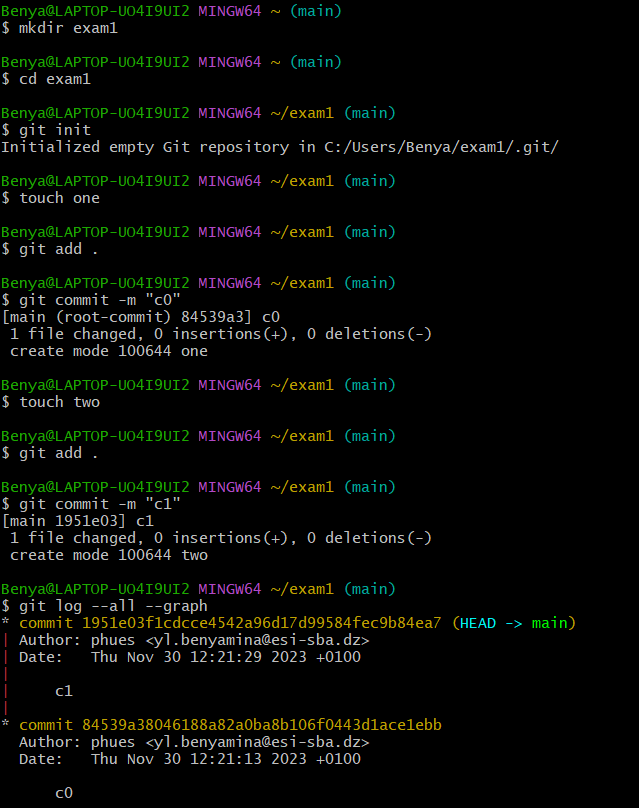


2. Now make the appropriat git commandes  that allows you reach  goal (02) from goal (01) shown in the following Figure. 

![Git Challenge 2](figures/Git_goal2.png)


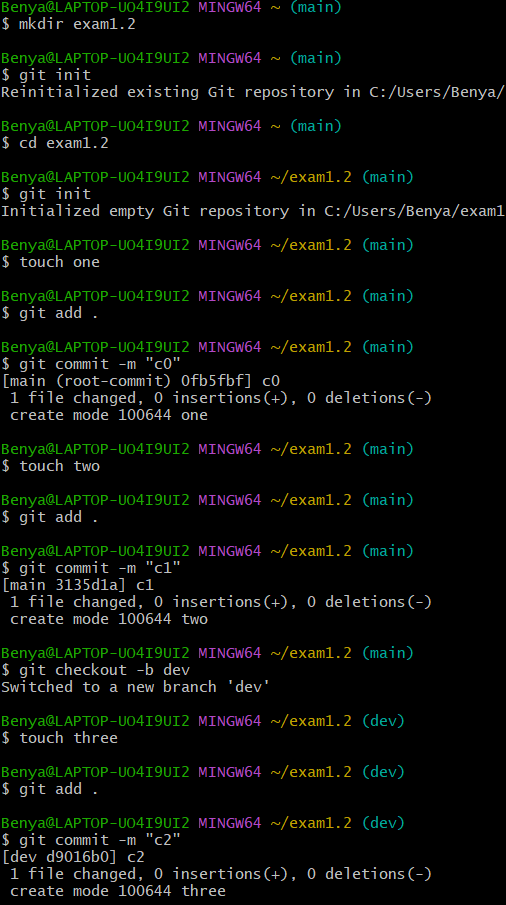

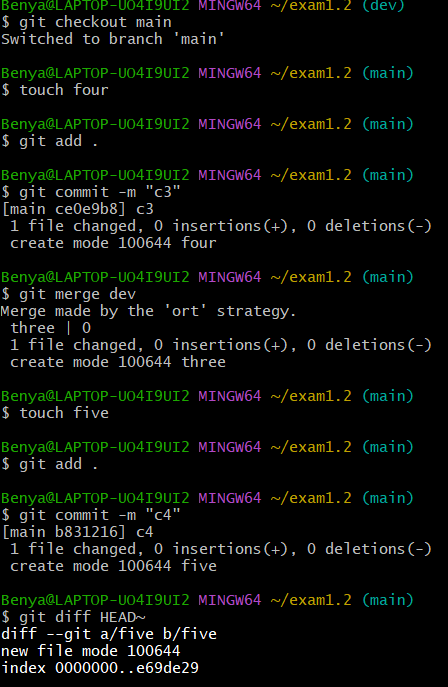

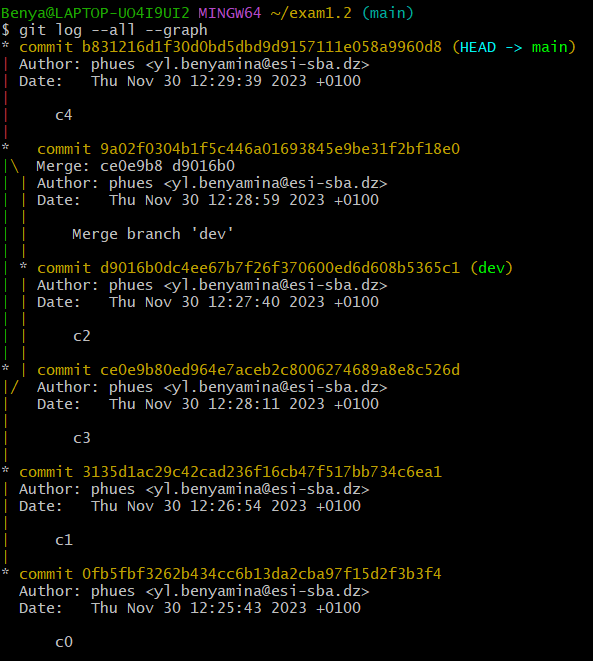

## Challenge 02: Web Scraping and Text Analysis for Goodreads Quotes


#### I. Objective:
You're in the initial stages of a new position as a Data Scientist at Goodreads (https://www.goodreads.com/) company. Your primary task is to build a robust understanding of customer sentiments and preferences related to quots, focusing on the `Motivational` tag.

The team you're collaborating with has a specific interest in quotes from the `Motivational` tag on Goodreads. They've tasked you with conducting web scraping and basic text analysis on quotes from this category. Your goal is to provide insights into the most frequently occurring keywords in these quotes.



#### II.  Requirements:

##### 1. Web Scraping:

1. Using Python along with a web scraping library such as `BeautifulSoup` to extract quotes from the `Motivational` tag on Goodreads.
2. Scraping the text quotes content from the two following pages:
  *  https://www.goodreads.com/quotes/tag/motivational?page=1

  *  https://www.goodreads.com/quotes/tag/motivational?page=2

  

##### 2. Text Analysis:

1. Performing basic text analysis on the scraped quotes to identify the most common frequency keywords.
2. Implementing removal of stop words and any undesirable charachters to focus on significant terms.
3. Utilizing appropriate data structures, such as lists or dictionaries, to store and analyze keyword frequencies.

##### 3. Visualization:

1. Generating a visual report (e.g., word cloud, bar chart) summarizing the most frequent keywords found in the `Motivational` scraped quotes on Goodreads.

#### III. Tasks:

1. Provide either a well written Class `GoodreadsScraper` or a well written code to scrap, analyse, and plot the most frequent quots from `1` pagination url. Test your class or code with:
``` python
url = "https://www.goodreads.com/quotes/tag/motivational?page=1"
```
* Document your Class or code comprehensively, including comments to explain key steps and decisions, while refactoring either your class code or your code without class into seperate specific methods.
2. Now create another Class `MultiPageGoodreadsScraper` that inherit from `GoodreadsScraper` or update your code without class to scrap, analyse, and plot quots from `n` pagination urls. Test your class with a list of `urls` :
``` python
urls = ["https://www.goodreads.com/quotes/tag/motivational?page=1","https://www.goodreads.com/quotes/tag/motivational?page=2"]
```




### Hints:
1- Each quote detail text is displayed in an html markup `div` with class name: `quoteText` as shown in the figure hereafter.
You may get any `<html_markup_name>` contents for a specific class name by using the following code: 
``` python
soup.find_all("<html_markup_name>", {"class": "<class_name>"})
```

Additionally, you may consider using the Browser Dev. Tools for further assistance and html componenets inspections.

2- Each `quoteText` div contains the text to be scraped, which includes also:
* A `span` html markup with class name `authorOrTitle` that contains the `author` of the quote.
* An `a` html markup with class name `authorOrTitle` that contains the author's book title from which the quote is taken.

3- Note that both the  text of the `span` and the `a` markups have to be removed from the text of `quoteText`.

4- For the structure of your Class `GoodreadsScraper` or your code without defining a class, you may define methods such as:
* A sepcific method to extract quotes from the url content.
* A sepecific method to clean the quotes text from unwanted characters
* A specific method to tokenize and remove stopwords from the quotes text
* A specific method to analyze and plot word frequency and word cloud

5- For the structure of your Class `MultiPageGoodreadsScraper` or your code without defining a class, you may add methods such as:
* A sepecific method to scrape quotes from all specified pages
* A specific method to analyze and plot word frequency and word cloud for all pages



<figure>
  <IMG src="figures/SCRAPPING.png"  ALIGN="right">
</figure>

### Your Solution if you prefer to use Classes (Additional Points are much given to this Option)
Note that much points will be granted to the  python codes  strongly refactored.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Benya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


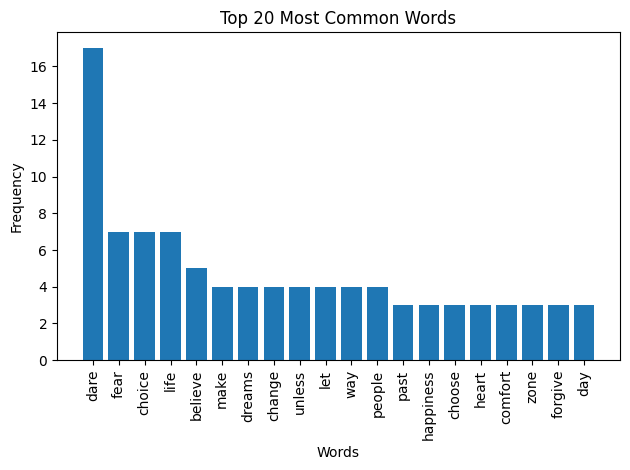

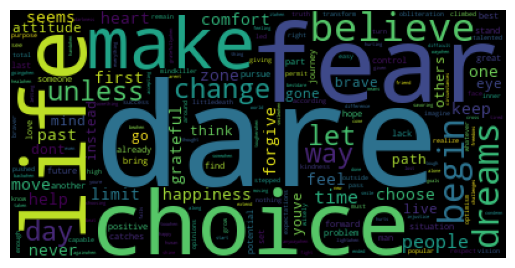

In [65]:
#Your Class Code for one url example
import string
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import lxml
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

class GoodreadsScraper:
    def __init__(self, url):
        self.url = url

    #function for web scraping
    def extract_text(self):
        url = self.url
        page = urlopen(url).read().decode('utf-8')
        soup = bs(page)
        links = soup.find_all('div', class_='quoteText')
        all_link_text = []

        #remove span and a markups
        for a in soup.find_all('span', class_='authorOrTitle'):
            a.decompose()
        for a in soup.find_all('a', class_='authorOrTitle'):
            a.decompose()

        all_link_text.extend([a.text for a in links])

        text = ' '.join(all_link_text)
        return text

    def clean_text(self, text):
        # Removing unneccessary punctuation and tags
        translator = str.maketrans('\n',' ',string.punctuation + string.digits + '`' + '[' + ']' + '“' + '”' + '-' + '–' + '’' + '―')
        return text.translate(translator)

    def remove_stop_words(self, text):
        
        # Tokenization
        nltk.download('punkt')
        tokens = nltk.word_tokenize(text.lower())
        nltk.download('stopwords')
        # Removing stopwords
        en_stopwords = stopwords.words('english')
        en_stopwords = set(en_stopwords)
        words = [w.lower() for w in tokens if w not in en_stopwords]
        return words

    def analyze_words(self, words):
        cnt_fdist = nltk.FreqDist(words)
        cnt_fdist.most_common(20)
        common_words = [word[0] for word in cnt_fdist.most_common(20)]
        word_freq = [freq[1] for freq in cnt_fdist.most_common(20)]
        return [common_words, word_freq]
        

url = 'https://www.goodreads.com/quotes/tag/motivational?page=1'
scrapper = GoodreadsScraper(url)
text = scrapper.extract_text()
text = scrapper.clean_text(text)
words = scrapper.remove_stop_words(text)

analyzed = scrapper.analyze_words(words)
plt.bar(analyzed[0], analyzed[1])
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Benya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


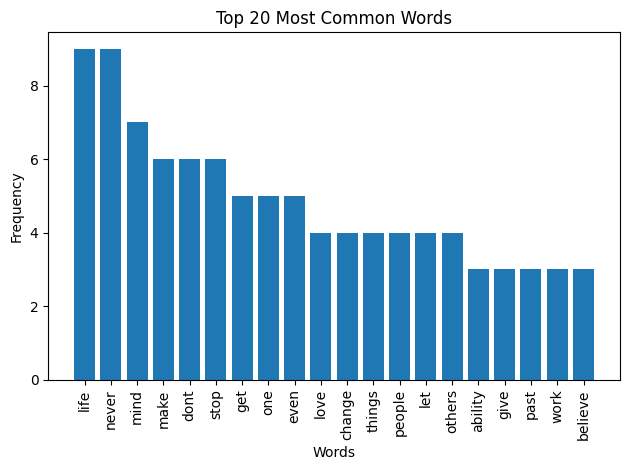

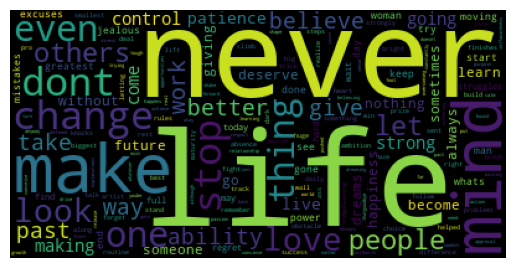

In [70]:
# Your Class code for n pages urls with testing of the 2 pages urls mentioned above
class MultiPageGoodreadsScraper(GoodreadsScraper):
    # Complete the code hile removing pass
    def __init__(self, urls):
        self.urls = urls
    #function for web scraping
    def extract_text(self):
        urls = self.urls
        for url in urls:
            page = urlopen(url).read().decode('utf-8')
            soup = bs(page)
            links = soup.find_all('div', class_='quoteText')
            all_link_text = []

            #remove span and a markups
            for a in soup.find_all('span', class_='authorOrTitle'):
                a.decompose()
            for a in soup.find_all('a', class_='authorOrTitle'):
                a.decompose()

            all_link_text.extend([a.text for a in links])

            text = ' '.join(all_link_text)
        return text

urls = ["https://www.goodreads.com/quotes/tag/motivational?page=1","https://www.goodreads.com/quotes/tag/motivational?page=2"]
multi_scrapper = MultiPageGoodreadsScraper(urls)
text = multi_scrapper.extract_text()
text = multi_scrapper.clean_text(text)
words = multi_scrapper.remove_stop_words(text)

analyzed = multi_scrapper.analyze_words(words)
plt.bar(analyzed[0], analyzed[1])
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Your Solution if you prefer to use Code without defining Classes
Note that much points will be granted to the  python codes  strongly refactored.

In [6]:
#Your  Code for one url example


In [7]:
# Your  code for n pages urls with testing of the 2 pages urls mentioned above

## Challenge 03: Data Cleaning Challenge for Oil & Gas Dataset

#### Context:
You have recently joined as a data scientist specialist in the Data Science Department of the prominent energy company, Sonatrach. Specifically, you are assigned to the Gas and Oil complex located in Hassi Messoud, Ouargla. The department has initiated a project focused on developing, testing, and assessing various time series forecasting machine learning models for the analysis of daily Gaz & Oil production. 

Your immediate task involves the thorough cleaning and provision of a fundamental exploratory data analysis (EDA) for the dataset stored in the `data/oil_gas_data.csv` file. This dataset has various data quality issues that need to be addressed to ensure its accuracy and reliability. The team you collaborate with is relying on your expertise to ensure the dataset's integrity and to gain insightful initial observations through exploratory analysis.


#### Dataset Description:
The dataset (`oil_gas_data.csv`) includes the following columns:

* `well_id`: Unique identifier for each well. However, there is only one identifier in the provided dataset.
* `date`: Date of observation.
* `drilling_depth`: Depth of drilling in feet.
* `drilling_speed`: Drilling speed in feet per hour.
* `well_temperature`: Temperature of the well in Celsius.
* `drilling_success`: Binary valid indicator (0 or 1) representing the unseccess or success of the drilling operation. However, there might be out-of-range values (not 0 or 1) present.
* `daily_oil_production`: Daily oil production in barrels.
* `daily_gas_production`: Daily gas production in cubic feet.

#### Tasks:

1. Proceed with General Data Cleaning steps to provide a clean dataset.
2. Proceed with  General EDA steps to provide inseightfull visual plots for each feature.
3. Report the possible high correlations found from your visualization EDA.
4. Save your cleaned dataset into a csv file named `cleaned_oil_gas_data.csv`

### Hints:

##### 1. Reading the csv file:
Make sure to successfully reading the csv file.  Consider the following aspects:
- Specify the appropriate column separator.
- Define the correct decimal separator.
- Ensure the correct encoding of the file.

##### 2. Removing unecessary unit mesures:
- Review the dataset and identify any unnecessary unit measures that might have been introduced. Remove these unnecessary units to ensure consistency.

##### 3. Handling Missing Values:
Identify and handle missing values in the dataset. Consider using appropriate strategies such as removal or filling with mode, mean, medean, ...,etc.

##### 4. Dealing with Outliers:
Identify, explore and address outliers in the appropriate feature. Use visualizations or statistical methods to identify and handle outliers.

##### 5. Handling Categorical Data:
* Identify and handle out-of-range values in the `drilling_success` column. Decide on an appropriate strategy to handle these values, such as removal or replacing the out-of-range values by the most highest mode.
* Now, since `drilling_success` is represented only as integers (0 or 1), consider converting it to a categorical variable with appropriate labels (e.g: 0: 'unsuccess', 1:'success').

##### 6. Data Types Conversion & Indexing:
* Make sure that the type of each column is converted to its appropriate type rather than `object` type:
    -  `date` column to a `datetime` data type.
    -  `drilling_depth`, `drilling_speed`, `well_temperature`, `daily_oil_production`, and `daily_gas_production`  columns to a `numeric` data type.
* Meke sure that your final dataset is indexed with `date`.
   



In [5]:
import pandas as pd

df = pd.read_csv('data/oil_gas_data.csv', sep=';', encoding = "ISO-8859-1")
df.head(25)

,date,well_id,drilling_depth,drilling_speed,well_temperature,drilling_success,daily_oil_production,daily_gas_production
0,01/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,8352.41 feet,42.04 feet/hour,135.24 °C,1,5249.935 barrels/day,5468.664 cubic feet/day
1,02/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,5774.25 feet,42.96 feet/hour,97.66 °C,0,3695.4 barrels/day,3953.42 cubic feet/day
2,03/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,4815.45 feet,51.21 feet/hour,99.11 °C,1,3259.092 barrels/day,3529.442 cubic feet/day
3,04/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,4946.49 feet,79.24 feet/hour,60.27 °C,1,3345.738 barrels/day,3408.38 cubic feet/day
4,05/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,4723.77 feet,62.42 feet/hour,257.44 °C,1,3214.31 barrels/day,2989.63 cubic feet/day
5,06/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,7927.47 feet,48.27 feet/hour,195.06 °C,1,5091.28 barrels/day,4984.414 cubic feet/day
6,07/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,6366.17 feet,77.55 feet/hour,30.76 °C,1,4224.882 barrels/day,4276.979 cubic feet/day
7,08/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,6579.34 feet,41.79 feet/hour,109.82 °C,0,4164.696 barrels/day,4462.824 cubic feet/day
8,09/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,9039.39 feet,68.71 feet/hour,268.64 °C,1,5820.778 barrels/day,5589.587 cubic feet/day
9,10/01/2022,cda1607e-ad63-4932-a207-01ba25d6f20c,5058.12 feet,73.58 feet/hour,254.58 °C,1,3433.681 barrels/day,3237.258 cubic feet/day


In [6]:
df.describe()

,drilling_success
count,1064.000000
mean,0.659774
std,0.584238
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


In [16]:
df.isnull().sum()

drilling_depth          0
drilling_speed          0
well_temperature        0
drilling_success        0
daily_oil_production    0
daily_gas_production    0
dtype: int64

In [8]:
df.dtypes

date                    object
well_id                 object
drilling_depth          object
drilling_speed          object
well_temperature        object
drilling_success         int64
daily_oil_production    object
daily_gas_production    object
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [11]:
df.set_index('date', inplace=True)
df.head()

,well_id,drilling_depth,drilling_speed,well_temperature,drilling_success,daily_oil_production,daily_gas_production
date,,,,,,,
2022-01-01,cda1607e-ad63-4932-a207-01ba25d6f20c,8352.41 feet,42.04 feet/hour,135.24 °C,1,5249.935 barrels/day,5468.664 cubic feet/day
2022-01-02,cda1607e-ad63-4932-a207-01ba25d6f20c,5774.25 feet,42.96 feet/hour,97.66 °C,0,3695.4 barrels/day,3953.42 cubic feet/day
2022-01-03,cda1607e-ad63-4932-a207-01ba25d6f20c,4815.45 feet,51.21 feet/hour,99.11 °C,1,3259.092 barrels/day,3529.442 cubic feet/day
2022-01-04,cda1607e-ad63-4932-a207-01ba25d6f20c,4946.49 feet,79.24 feet/hour,60.27 °C,1,3345.738 barrels/day,3408.38 cubic feet/day
2022-01-05,cda1607e-ad63-4932-a207-01ba25d6f20c,4723.77 feet,62.42 feet/hour,257.44 °C,1,3214.31 barrels/day,2989.63 cubic feet/day


In [12]:
df = df.astype(str)
df.dtypes

well_id                 object
drilling_depth          object
drilling_speed          object
well_temperature        object
drilling_success        object
daily_oil_production    object
daily_gas_production    object
dtype: object

In [13]:
df.drop(columns=['well_id'], inplace=True)

In [14]:
def removeUnits(col, unit):
    df[col] = df[col].str.replace(unit,'')

removeUnits('drilling_depth', 'feet')
removeUnits('drilling_depth', '.')

df.head()

,drilling_depth,drilling_speed,well_temperature,drilling_success,daily_oil_production,daily_gas_production
date,,,,,,
2022-01-01,835241,42.04 feet/hour,135.24 °C,1,5249.935 barrels/day,5468.664 cubic feet/day
2022-01-02,577425,42.96 feet/hour,97.66 °C,0,3695.4 barrels/day,3953.42 cubic feet/day
2022-01-03,481545,51.21 feet/hour,99.11 °C,1,3259.092 barrels/day,3529.442 cubic feet/day
2022-01-04,494649,79.24 feet/hour,60.27 °C,1,3345.738 barrels/day,3408.38 cubic feet/day
2022-01-05,472377,62.42 feet/hour,257.44 °C,1,3214.31 barrels/day,2989.63 cubic feet/day


In [15]:
removeUnits('drilling_speed', 'feet/hour')
removeUnits('drilling_depth', '.')
removeUnits('well_temperature', '°C')
removeUnits('well_temperature', '.')
removeUnits('daily_oil_production', 'barrels/day')
removeUnits('daily_oil_production', '.')
removeUnits('daily_gas_production', 'cubic feet/day')
removeUnits('daily_gas_production', '.')

df.head()

,drilling_depth,drilling_speed,well_temperature,drilling_success,daily_oil_production,daily_gas_production
date,,,,,,
2022-01-01,835241,42.04,13524,1,5249935,5468664
2022-01-02,577425,42.96,9766,0,36954,395342
2022-01-03,481545,51.21,9911,1,3259092,3529442
2022-01-04,494649,79.24,6027,1,3345738,340838
2022-01-05,472377,62.42,25744,1,321431,298963


In [17]:
## convert nan values to -1 so we can adress them later
for col in df.columns:
    df[col] = df[col].str.replace('nan','-1')

df.head(45)

,drilling_depth,drilling_speed,well_temperature,drilling_success,daily_oil_production,daily_gas_production
date,,,,,,
2022-01-01,835241,42.04,13524,1,5249935,5468664
2022-01-02,577425,42.96,9766,0,36954,395342
2022-01-03,481545,51.21,9911,1,3259092,3529442
2022-01-04,494649,79.24,6027,1,3345738,340838
2022-01-05,472377,62.42,25744,1,321431,298963
2022-01-06,792747,48.27,19506,1,509128,4984414
2022-01-07,636617,77.55,3076,1,4224882,4276979
2022-01-08,657934,41.79,10982,0,4164696,4462824
2022-01-09,903939,68.71,26864,1,5820778,5589587


In [18]:
#covert columns to numeric type 
for col in df.columns:
    df[col] = pd.to_numeric(df[col])
df.dtypes

drilling_depth            int64
drilling_speed          float64
well_temperature          int64
drilling_success          int64
daily_oil_production      int64
daily_gas_production      int64
dtype: object

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

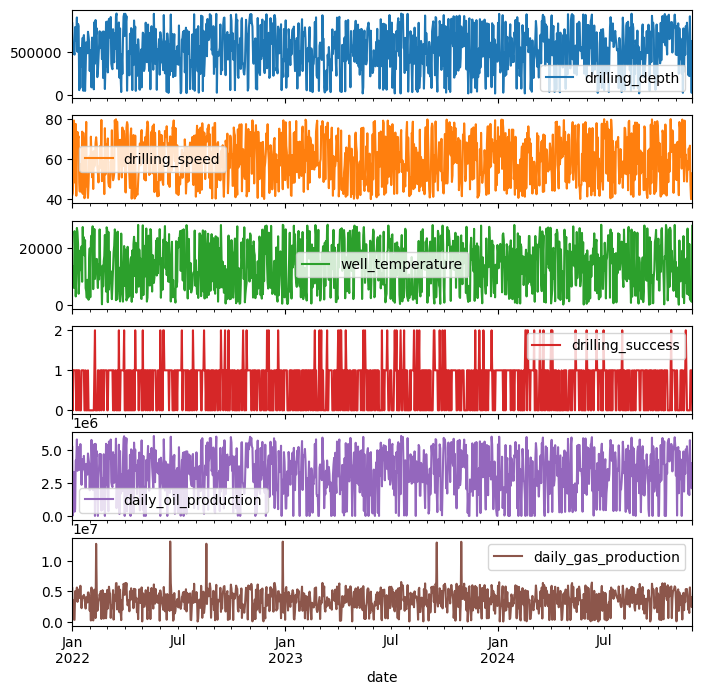

In [19]:
#Genaral EDA checlist
import matplotlib.pyplot as plt
import  seaborn as sns

df.plot(subplots=True, figsize=(8, 8))

<Axes: >

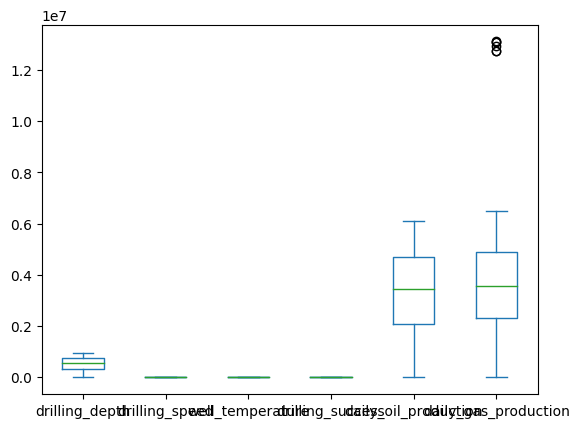

In [20]:
df.plot.box()

In [24]:
#handle missing values
import numpy as np

for col in df.columns:
    df[col] = df[col].replace(-1, np.nan)
    df[col] = df[col].fillna(df[col].mean())
df.head(50)

,drilling_depth,drilling_speed,well_temperature,drilling_success,daily_oil_production,daily_gas_production
date,,,,,,
2022-01-01,835241,42.04,13524,1,5.249935e+06,5468664
2022-01-02,577425,42.96,9766,0,3.695400e+04,395342
2022-01-03,481545,51.21,9911,1,3.259092e+06,3529442
2022-01-04,494649,79.24,6027,1,3.345738e+06,340838
2022-01-05,472377,62.42,25744,1,3.214310e+05,298963
2022-01-06,792747,48.27,19506,1,5.091280e+05,4984414
2022-01-07,636617,77.55,3076,1,4.224882e+06,4276979
2022-01-08,657934,41.79,10982,0,4.164696e+06,4462824
2022-01-09,903939,68.71,26864,1,5.820778e+06,5589587


In [50]:
#identiyfy out of range in drilling success
df['drilling_success'] = df['drilling_success'].replace(2, 1)
df['drilling_success'] = df['drilling_success'].replace(1, 'success')
df['drilling_success'] = df['drilling_success'].replace(0, 'unsuccess')

df.head()

,drilling_depth,drilling_speed,well_temperature,drilling_success,daily_oil_production,daily_gas_production
date,,,,,,
2022-01-01,835241,42.04,13524,success,5249935.0,5468664
2022-01-02,577425,42.96,9766,unsuccess,36954.0,395342
2022-01-03,481545,51.21,9911,success,3259092.0,3529442
2022-01-04,494649,79.24,6027,success,3345738.0,340838
2022-01-05,472377,62.42,25744,success,321431.0,298963


In [25]:
#removing outliers
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df

for col in df.columns:
    df_clean = remove_outliers(df, col)

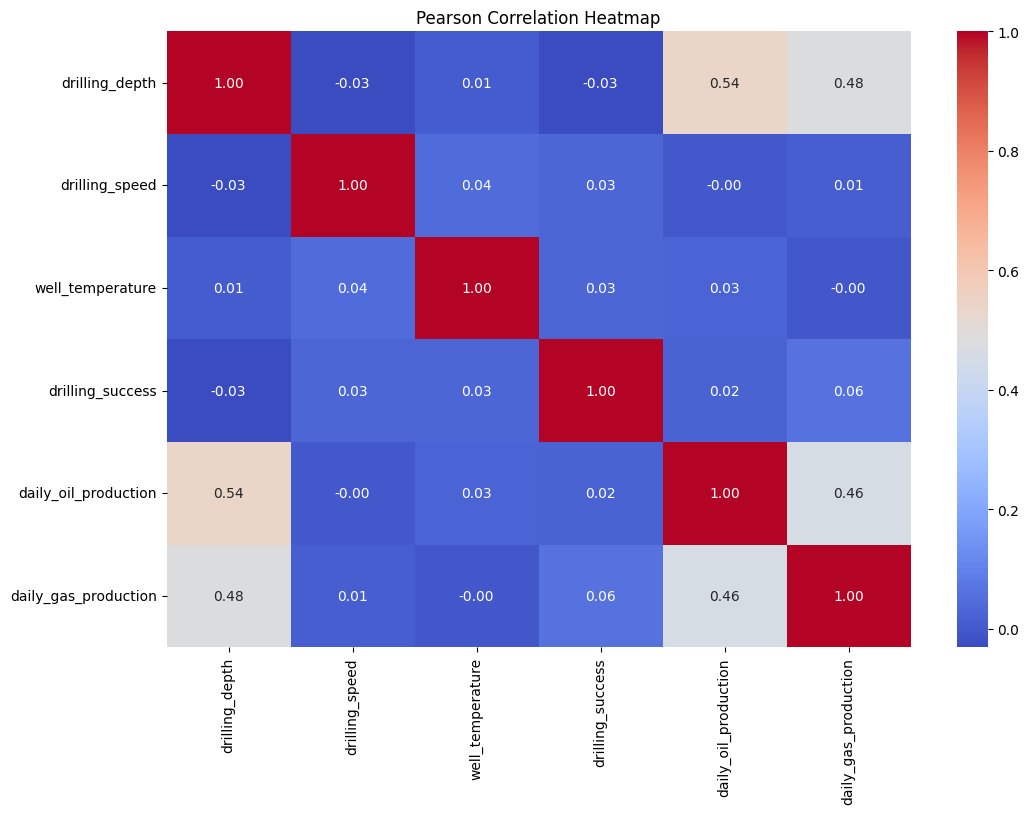

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

-We notice that drilling depth is correlated with daily oil and gas production, this makes sense because the deeper you drill the more likely you are to produce more


-Daily oil production is also somewhat correlated with daily gas production, this is also logical as both are produced by same company

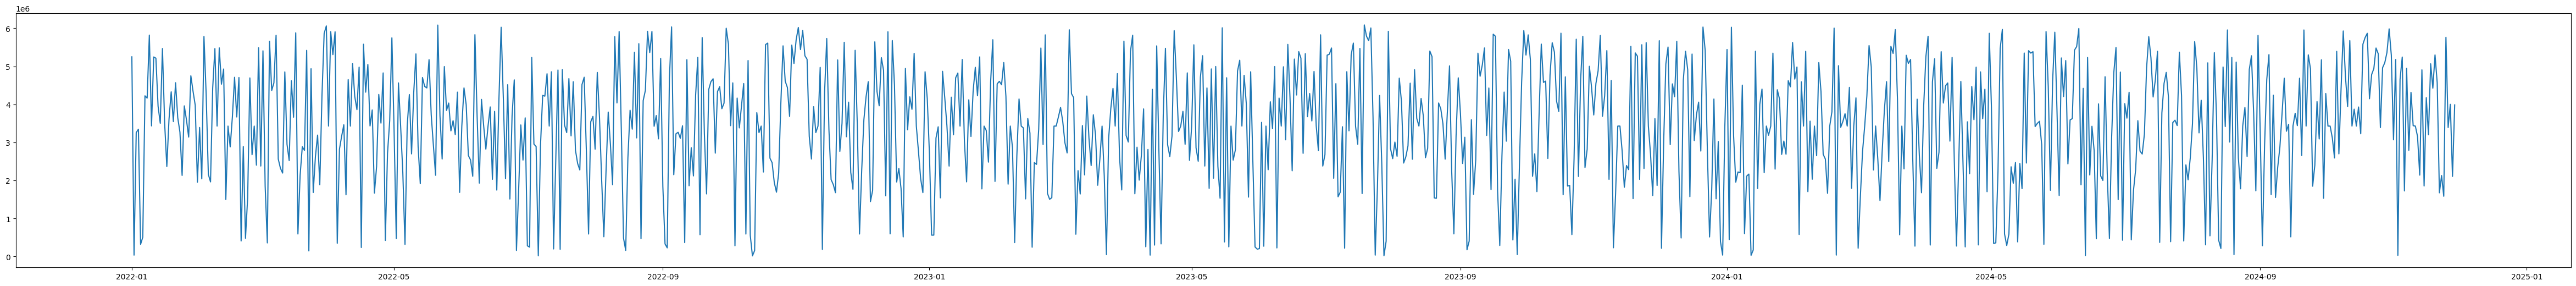

In [47]:
# graph of daily oil production:
plt.figure(figsize=(60, 6))
plt.plot(df.index, df['daily_oil_production'])

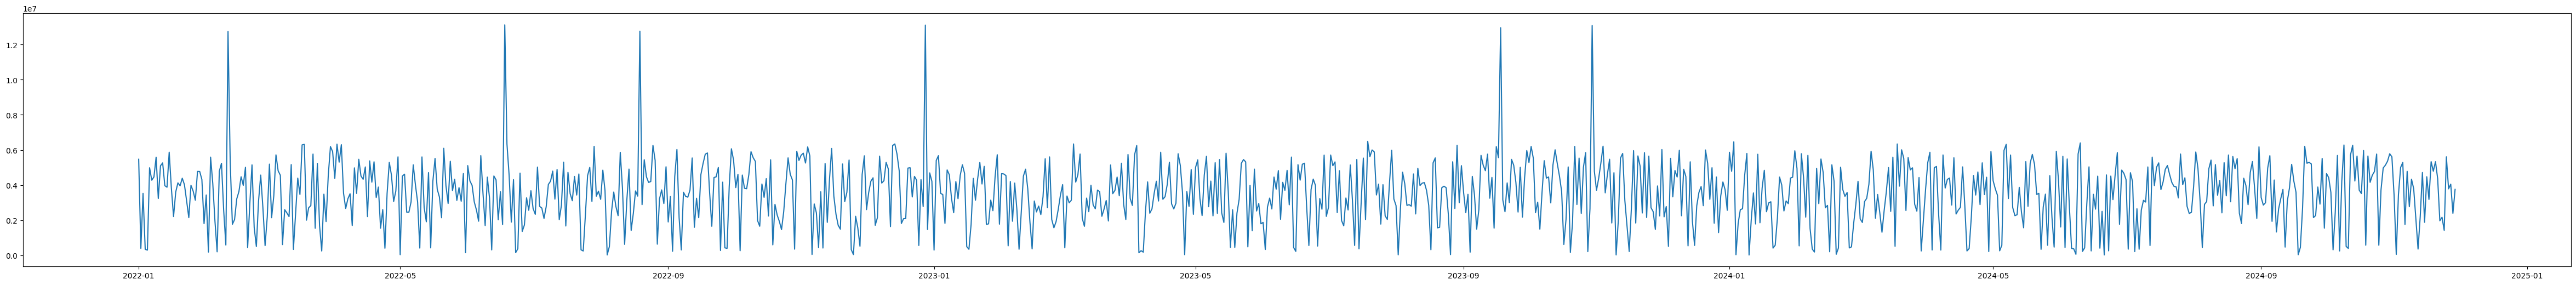

In [48]:
# graph of daily gas production:
plt.figure(figsize=(60, 6))
plt.plot(df.index, df['daily_gas_production'])

In [51]:
#save the new cleaned data to a csv file
df.to_csv('data/cleaned_oil_gas_data.csv', index=True)

## Challenge 04: Unit Testing for Oil & Gas Dataset
we want to apply unit testing with a data science focus. An updated version of the oil and gas dataset, `test_oil_gas_data.csv`, is provided in the `data` subfolder. This dataset contains some missing values, and your task is to create a unit testing module to check the validity of each row.

1. Complete the following testing code to create your testing module.

```python
import csv
import pytest

def row_to_list(s):
    return list(s.split())

# Load your dataset from the CSV file
dataset = []
with open('<path_to_your_dataset.csv>', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        dataset.append(row)

# Test if the function correctly handles rows with missing values
# Parametrize the test function to iterate through each row in the dataset
@pytest.mark.parametrize("input_row", dataset)
def test_row_to_list_with_missing_values(input_row):
        #Complete the function to assert if any missing value is found in your input_string
```

2. Test your testing module and report the number of failures and successes.
    * Provide a screenshot of the last line reporting the number of failed and the number of passed operations.

In [9]:
#Your solution
import csv
import pytest

def row_to_list(s):
    return list(s.split())

# Load your dataset from the CSV file
dataset = []
with open('data/test_oil_gas_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        dataset.append(row)

# Test if the function correctly handles rows with missing values
# Parametrize the test function to iterate through each row in the dataset
@pytest.mark.parametrize("input_row", dataset)
def test_row_to_list_with_missing_values(input_row):
        #Complete the function to assert if any missing value is found in your input_string
        assert any([value == '?' for value in input_row]) == False, "Missing values found in input_row"

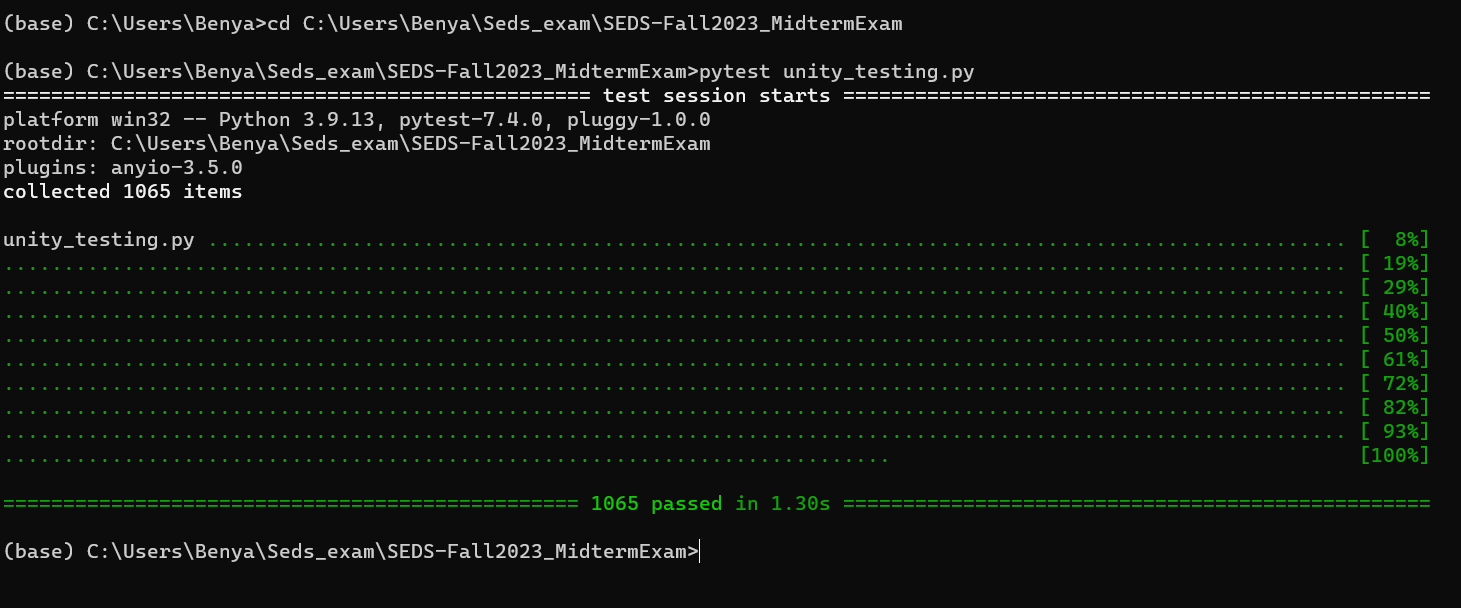

# Final Remarks:

1. Zip the entire folder that contains your jupyther notebook, the  cleaned data, snapshots, and  testing module in one file named as your esi-sba  email 
2. Send the compressed file to b.khaldi@esi-sba.dz